In [1]:
import pandas as pd
import numpy as np
import re
import os

from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
from gensim.test.utils import datapath
from tqdm.notebook import tqdm
from pymystem3 import Mystem
import pymorphy2
import nltk
from nltk.corpus import stopwords

import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

J:\Vadim\envs\TensorFlowEd\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
f = open(r'C:/Users/Вадим/Desktop/GeekBrains/Introduction_to_NLP/HW_Lesson_2/combine_df.txt', 'rb')
train_df = pickle.load(f)
f.close()

In [4]:
train_df.drop(columns = ['tweet', 'tweet_token', 'tweet_token_filtered', 'tweet_stemmed'], axis = 1, inplace=True)
train_df.rename(columns = {'tweet_lemmatized' : 'tweet'}, inplace = True)
train_df.head()

,id,label,tweet
0,1,0.0,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,thanks lyft credit use cause offer wheelchair ...
2,3,0.0,bihday majesty
3,4,0.0,model love yoyou take yoyou time yoyour
4,5,0.0,factsguide society motivation


In [5]:
bad_word = ['good', 'one', 'year', 'think', 'next', 'went', 'word', 'sign', 'blue', 'bring', 'wwim', 'end', 'en', 'por', 'mi', 'se', 
            'new', 'today', 'see', 'oh', 'hour', 'close', 'trying', 'living', 'place', 'could', 'would', 'made', 'okay', 'enough', 'del',
            'something', 'talking', 'huge', 'tear', 'adapt', 'really', 'someone', 'come', 'day', 'say', 'much', 'really', 'su', 'el', 
            'last', 'back', 'coming', 'share', "work", "th", "week", "medium", "follow", "hea", "followme", 'minute', 'getting', 'e',
            'reuters', "half", "thank", "live", "never", "look", "little", "monday", "hard", "due", "cute", "loud", "always", "want", "go", 
            "whatever", "man", "wrong", "open", "cleveland", "yo", "hea", "reach", "complete", "u", "people", "friday", "via", 'o', 'hhm',
            "around", "thing", "really", "even", "impoant", "simple", "count", "cool", "going", "fuhered", "shit", "someone", 'boo',
            "thankful", "tonight", "rip", "away", "forever", "including", "early", "able", "evening", "sleep", "don't", "fuck", 'vmas',
            "thanks", "amazing", "use", "grateful", "ready", "losing", "wanted", "great", "lovely", "agree", "retweet", "first", "absolutely", 
            "looking", "stomping", "miami", "back", "everyone", "please", "watching", "tampa", "yet", "many", "spend", "america", 'askdemi',
            "butt", "try", "wait", "long", "every", "always", "smh", "еp", "watched", "awesome", "shall", "finally", "working", "well", 
            "deletetweets", "might", "tweet", "old", "oitnb", "sta", "thing", "first", "together", "watching", 'also', 'gyouys', 'nothing',
            "tomorrow", "welcome", "first", "wait", "yes", "new", "back", "going", "wake", "last", "hopefully", "mad", "done", "listen",
            "shall", "week", "gone", "morning", "water", "berlin", "rich", "shower", "newyork", "god", "work", "listening", 'haha',
            "nice", "dear", "always", "easy", "positivity", "embrace", "aар", "sjw", "minion", "melbourne", "ashiq", "kejriwal", 'taking',
            "faraz", "ghalib", "iqbal", "mohsin", "sirf", "wasi", "sukhbir", "average", 'tf', 'tgif', 'get', 'take', 'st', 'got', 'may', 'los',
            'used', 'pa', 'tbt', 'ever', 'bob', 'yoy', 'make', 'another', 'making', 'mean', 'everything', 'perfect', 'huh', 'empty', 'ok',
            'almost', 'side', 'high', 'htt', 'remember', 'others', 'glad', 'third', 'put', 'na', 'still', 'set', 'let', 'fbi', 'ht', 'became',
            'believe', 'cant', 'edc', 'staing', 'whole', 'line', 'dropped', 'perfect', 'enjoy', 'cancelled', 'ohio', 'wow', 'find', 'become',
            'nmm', 'fff', 'things', 'sometimes', 'years', 'hashtag', 'shak', 'gonna', 'shakhq', 'shakirahq', 'shq', 'aqui', 'que',
            'ya', 'anyone', 'as', 'le', 'si', 'yeah', 'hahaha', 'give', 'two', 'est', 'april', 'pm', 'month', 'anything', 'nyc', 'devonnebydemi',
            'para', 'know', 'hmm', 'ru', 'ta', 'de', 'la', 'nyfw', 'gr', 'inc', 'ing', 'omg', 'soooo', 'hi', 'ft', 'time', 'big', 'tt', 'rt',
            'cavs', 'silence', 'nz', 'without', 'wakeup', 'pre', 'gon', 'yay', 'better', 'thats', 'hey', 'aap', 'hbd', 'among'] 
# \ '', '', '', '', '', '', '', '', '', '',

In [6]:
def stop_bad_word(tweets, stopwords = bad_word):
    return " ".join([w for w in tweets if not w in stopwords])

In [7]:
'taking' in bad_word

True

In [8]:
f = open(r'df_dop_tweet.txt', 'rb')
tweets = pickle.load(f)
f.close()
tweets.drop(columns = ['tweet', 'tweet_token', 'tweet_token_filtered', 'tweet_stemmed'], axis = 1, inplace=True)
tweets.head()

,tweet_lemmatized
0,history repeating dontnormalizehate
1,thank incredible grace leadership exceptional
2,life goal
3,right
4,sister doin


In [9]:
# df_tweets = pd.DataFrame(tweets, columns=['content'])
df_tweets = pd.DataFrame(tweets, columns=['tweet_lemmatized'])
df_tweets.columns = ['tweet']
df_tweets.head(3)

,tweet
0,history repeating dontnormalizehate
1,thank incredible grace leadership exceptional
2,life goal


In [10]:
train_df = pd.concat([train_df, df_tweets], sort=False, axis=0)
train_df.head()

,id,label,tweet
0,1.0,0.0,father dysfunctional selfish drag kid dysfunct...
1,2.0,0.0,thanks lyft credit use cause offer wheelchair ...
2,3.0,0.0,bihday majesty
3,4.0,0.0,model love yoyou take yoyou time yoyour
4,5.0,0.0,factsguide society motivation


In [11]:
train_df['tweet_list'] = train_df['tweet'].apply(lambda x: stop_bad_word(list(x.split())))

In [12]:
train_df.shape

(101701, 4)

In [14]:
train_df.set_index(np.arange(0,len(train_df)))
train_df = train_df.loc[~(train_df['tweet_list'] == '')]
train_df.head()

,id,label,tweet,tweet_list
0,1.0,0.0,father dysfunctional selfish drag kid dysfunct...,father dysfunctional selfish drag kid dysfunct...
1,2.0,0.0,thanks lyft credit use cause offer wheelchair ...,lyft credit cause offer wheelchair van pdx dis...
2,3.0,0.0,bihday majesty,bihday majesty
3,4.0,0.0,model love yoyou take yoyou time yoyour,model love yoyou yoyou yoyour
4,5.0,0.0,factsguide society motivation,factsguide society motivation


In [15]:
len(train_df)

98773

In [16]:
train_df['tweet_list'] = train_df['tweet_list'].apply(lambda x: list(x.split()))
train_df.head(3)

,id,label,tweet,tweet_list
0,1.0,0.0,father dysfunctional selfish drag kid dysfunct...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2.0,0.0,thanks lyft credit use cause offer wheelchair ...,"[lyft, credit, cause, offer, wheelchair, van, ..."
2,3.0,0.0,bihday majesty,"[bihday, majesty]"


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [20]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [21]:
morph = pymorphy2.MorphAnalyzer()

In [22]:
dictionary = corpora.Dictionary(train_df['tweet_list'])

# игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) 
dictionary.save('tweet.dict')

Векторизуем tweets:

In [23]:
corpus = [dictionary.doc2bow(text) for text in train_df['tweet_list']]
corpora.MmCorpus.serialize('tweet.model', corpus) 

Обучим модель:

In [24]:
%time 
lda = LdaModel(corpus, id2word=dictionary, num_topics=12, chunksize=50, update_every=1, passes=10)

CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
# Сохраняем модель на диск
temp_file = datapath("C:/Users/Вадим/Desktop/GeekBrains/Introduction_to_NLP/Lectures/Lesson_4/model_lda.lda")
lda.save(temp_file)

Посмотрим на получившиеся темы:

In [26]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(1,
  '0.065*"friend" + 0.054*"miss" + 0.045*"meet" + 0.036*"change" + 0.036*"soon" + 0.032*"weeklyfluff" + 0.028*"picture" + 0.027*"performance" + 0.027*"track" + 0.024*"stop"'),
 (11,
  '0.106*"song" + 0.043*"support" + 0.039*"fan" + 0.032*"game" + 0.031*"hondacivictour" + 0.028*"playing" + 0.026*"behind" + 0.025*"studio" + 0.022*"lot" + 0.020*"futurenow"'),
 (0,
  '0.078*"video" + 0.042*"album" + 0.038*"shakira" + 0.034*"check" + 0.026*"post" + 0.017*"stage" + 0.016*"scene" + 0.015*"mind" + 0.013*"shoot" + 0.013*"free"'),
 (9,
  '0.097*"show" + 0.076*"project" + 0.056*"night" + 0.042*"submission" + 0.034*"music" + 0.029*"hope" + 0.029*"participate" + 0.028*"congrats" + 0.025*"tune" + 0.020*"family"'),
 (2,
  '0.242*"love" + 0.032*"fun" + 0.024*"artist" + 0.023*"moment" + 0.023*"order" + 0.019*"un" + 0.018*"play" + 0.015*"gracias" + 0.012*"second" + 0.012*"exclusive"'),
 (4,
  '0.098*"guy" + 0.071*"like" + 0.063*"coolforthesummer" + 0.058*"watch" + 0.045*"way" + 0.039*"proud" + 0.03

На полученные темы посмотрим, изобразив их на плоскости с помощью библиотеки pyLDAvis. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [27]:
pyLDAvis.enable_notebook()

In [28]:
%time 
vis_data = gensimvis.prepare(lda, corpus, dictionary, mds='mmds')
pyLDAvis.display(vis_data)

CPU times: total: 0 ns
Wall time: 0 ns


J:\Vadim\envs\TensorFlowEd\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


#### Обзор по предложенным темам:

    1. confident, weekend, world, right, favorite, send, feel, buddy, sweet, explore
       уверенный, выходные, мир, правильный, любимый, отправить, чувствовать, приятель, сладкий, исследовать
       -------------------------
       Что-то из области выходных-поездок

    2. instagram, life, best, girl, real, baby, face, already, dream, pic
       инстаграм, жизнь, лучшее, девушка, настоящее, детка, лицо, уже, мечта, фото
       ------------------------
       обсуждение инстаграма

    3. guy, like, coolforthesummer, watch, way, proud, need, twitter, photographer, help
       парень, вроде, классно на лето, смотреть, путь, гордый, нужен, твиттер, фотограф, помогите
       ------------------------
       обсуждение мероприятия на лето, фотограф, парень, помощь

    4. video, album, shakira, check, post, stage, scene, mind, shoot, free, worldwide
       видео, альбом, шакира, проверить, опубликовать, сцена, сцена, ум, стрелять, бесплатно, по всему миру
       ------------------------
       обсуждение певицы Шакиры, её туров, выступлений

    5. love, fun, artist, moment, order, un, play, gracias, second, exclusive, hoy
       любовь, веселье, художник, момент, заказ, ип, игра, грасиас, второй, эксклюзивный, хой
       ------------------------
       заказ билетов на любимого артиста

    6. happy, incredible, story, beautiful, birthday, art, single, celebrate, brazil, wish, sing
       счастливый, невероятный, история, красивый, день рождения, искусство, сингл, праздновать, бразилия, желание, петь
       ------------------------
       обсуждение праздника

    7. show, project, night, submission, music, hope, participate, congrats, tune, family
       шоу, проект, ночь, подача, музыка, надежда, участие, поздравления, мелодия, семья
       ------------------------
       участие, посещения шоу

    8. woman, fucking, con, featured, hear, available, thought, food, phone, actually, playlist, beat, top, sunday
       женщина, чертовски, афера, рекомендуемая, слышать, доступная, мысль, еда, телефон, на самом деле, плейлист, бить, топ, воскресенье
       ------------------------
       куда же без этой темы

    9. song, support, fan, game, hondacivictour, playing, behind, studio, lot, futurenow
       Песня, поддержка, поклонник, игра, Honda Civic Tour, Играя, позади, Студия, много, Будущее сейчас
       ------------------------
       игровая индустрия

    10. friend, miss, meet, change, soon, weeklyfluff, picture, performance, track, stop, instameet
        друг, мисс, встреча, изменение, скоро, еженедельный пух, картина, представление, трек, стоп, знакомство с инстаграмом
        -----------------------
        знакомство, встречи

    11. photo, heart, wan, celebrating, special, makeup, party, loved, performing, hint, future
        фото, сердце, бледный, празднующий, особенный, макияж, вечеринка, любимый, исполнение, намек, будущее
        -----------------------
        вечеринка, фотосессия

    12. excited, workout, tour, sale, seeing, question, futurenowtour, summer, cause, ticket, perform, lovatics
        взволнованный, тренировка, тур, распродажа, наблюдение, вопрос, будущее сейчас, лето, причина, билет, выступление, ловатики (Деми Ловато —американская певица, автор песен и актёр)
        ----------------------
        опять про выступления и посещения шоу


In [29]:
print(lda.log_perplexity(corpus))

-11.571844200610649


In [30]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  9.428335680908387e-06


In [31]:
coherence_model_lda = CoherenceModel(model=lda, texts=train_df['tweet_list'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.48180837311732233


  0%|          | 0/6 [00:00<?, ?it/s]

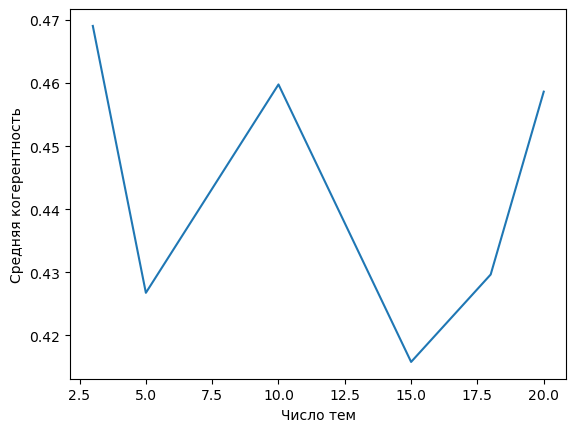

In [32]:
topics_list = [3, 5, 10, 15, 18, 20]
coherences = []

for num in tqdm(topics_list):
    lda_it = LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=10)
    coherences.append(CoherenceModel(model=lda_it, texts=train_df['tweet_list'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

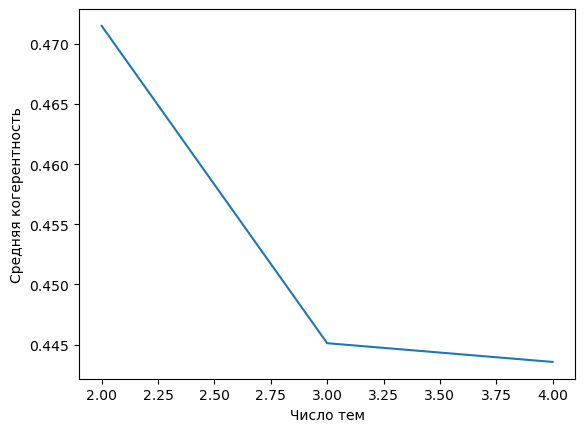

In [33]:
topics_list = [2, 3, 4]
coherences = []

for num in tqdm(topics_list):
    lda_it = LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=4)
    coherences.append(CoherenceModel(model=lda_it, texts=train_df['tweet_list'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

---